In [1]:
library(tidyverse)

theme_set(theme_light())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [2]:
college_admissions <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-09-10/college_admissions.csv')

Rows: 1946 Columns: 80
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): name, par_income_lab, tier, test_band_tier
dbl (74): super_opeid, par_income_bin, attend, stderr_attend, attend_level, attend_sat, stderr_attend_sat, attend_level_sat, rel_apply, stderr_...
lgl  (2): public, flagship

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1946 Columns: 80
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): name, par_income_lab, tier, test_band_tier
dbl (74): super_opeid, par_income_bin, attend, stderr_attend, attend_level, attend_sat, stderr_attend_sat, attend_level_sat, rel_apply, stderr_...
lgl  (2): public, flagship

ℹ Use `spec()` to 

Warning message:
Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`). 


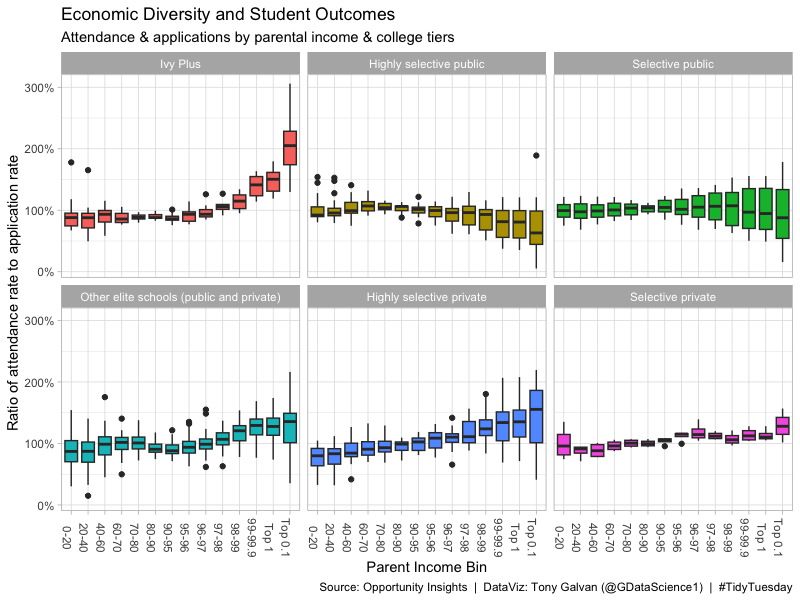

In [11]:
college_admissions |>
  mutate(
    tier = fct_reorder(tier, rel_att_cond_app, .na_rm = TRUE),
    par_income_lab = fct_reorder(par_income_lab, par_income_bin)
  ) |>
  ggplot(aes(par_income_lab, rel_att_cond_app, fill = tier)) +
  geom_boxplot() +
  facet_wrap(~tier) +
  scale_y_continuous(labels = scales::percent_format()) +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 270)
  ) +
  labs(
    x = "Parent Income Bin",
    y = "Ratio of attendance rate to application rate",
    title = "Economic Diversity and Student Outcomes",
    subtitle = "Attendance & applications by parental income & college tiers",
    caption = "Source: Opportunity Insights  |  DataViz: Tony Galvan (@GDataScience1)  |  #TidyTuesday"
  )

In [12]:
# This will save your most recent plot
ggsave(
  filename = "2024_09_10_tidy_tuesday_college.png",
  device = "png",
  height = 6,
  width = 9
)

Warning message:
Removed 2 rows containing non-finite outside the scale range (`stat_boxplot()`). 
